In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import plotly.io as pio
pio.renderers.default = 'notebook'

from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score, StratifiedKFold,KFold

from sklearn.metrics import (accuracy_score,classification_report,recall_score,precision_score,f1_score,confusion_matrix)

from mlxtend.evaluate import mcnemar_table , mcnemar_tables
from mlxtend.plotting import checkerboard_plot, plot_decision_regions
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.decomposition import PCA
%matplotlib inline

sns.set_style("darkgrid")
pd. set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("RTA Dataset.csv")

In [3]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,Residential areas,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,Recreational areas,other,NaN,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [4]:
df.tail()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,No defect,Outside rural areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,No defect,Outside rural areas,Two-way (divided with broken lines road marking),Escarpments,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,No defect,Outside rural areas,Two-way (divided with broken lines road marking),Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,1,1,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,No defect,Office areas,Undivided Two way,Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,1,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
12315,13:55:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Other,Owner,2-5yrs,No defect,Outside rural areas,Undivided Two way,Tangent road with mountainous terrain and,O Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,1,Stopping,Pedestrian,Female,5,3,Driver,Normal,Crossing from nearside - masked by parked or s...,Changing lane to the right,Slight Injury


In [5]:
df.sample(5)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
4521,8:30:00,Tuesday,18-30,Male,Junior high school,Owner,Below 1yr,Lorry (41?100Q),Owner,NaN,NaN,Office areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,Going straight,Driver or rider,Male,31-50,3,Self-employed,Normal,Not a Pedestrian,No distancing,Serious Injury
11844,13:00:00,Tuesday,Under 18,Male,NaN,Owner,5-10yr,Automobile,Owner,Unknown,No defect,Office areas,Undivided Two way,Tangent road with flat terrain,Crossing,Gravel roads,Dry,Daylight,Normal,Vehicle with vehicle collision,3,1,Going straight,Pedestrian,Male,5,2,Driver,Normal,Crossing from nearside - masked by parked or s...,No priority to pedestrian,Slight Injury
3381,7:40:00,Tuesday,18-30,Male,NaN,NaN,NaN,Lorry (41?100Q),Owner,Unknown,No defect,Other,Two-way (divided with broken lines road marking),Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,Going straight,Passenger,Male,Under 18,3,Driver,Normal,Not a Pedestrian,Other,Slight Injury
8319,9:10:00,Thursday,31-50,Male,Junior high school,Employee,2-5yr,Pick up upto 10Q,Organization,Above 10yr,NaN,Hospital areas,Two-way (divided with broken lines road marking),Tangent road with flat terrain,Crossing,Asphalt roads,Wet or damp,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,Self-employed,Normal,Not a Pedestrian,Other,Slight Injury
2070,22:45:00,Wednesday,31-50,Male,High school,Employee,Below 1yr,Pick up upto 10Q,Owner,Above 10yr,NaN,Residential areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,1,NaN,na,na,na,na,NaN,Normal,Not a Pedestrian,Driving at high speed,Slight Injury


# EDA

In [6]:
df.shape

(12316, 32)

In [7]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [8]:
col_map = {
    'Time': 'time',
    'Day_of_week': 'day_of_week',
    'Age_band_of_driver': 'driver_age',
    'Sex_of_driver': 'driver_sex',
    'Educational_level': 'education_level',
    'Vehicle_driver_relation': 'vehicle_driver_relation',
    'Driving_experience': 'driving_experience',
    'Type_of_vehicle': 'vehicle_type',
    'Owner_of_vehicle': 'vehicle_owner',
    'Service_year_of_vehicle': 'service_year',
    'Defect_of_vehicle': 'vehicle_defect',
    'Area_accident_occured': 'accident_area',
    'Lanes_or_Medians': 'lanes',
    'Road_allignment': 'road_alignment',
    'Types_of_Junction': 'junction_type',
    'Road_surface_type': 'surface_type',
    'Road_surface_conditions': 'surface_condition',
    'Light_conditions': 'light_condition',
    'Weather_conditions': 'weather_condition',
    'Type_of_collision': 'collision_type',
    'Number_of_vehicles_involved': 'vehicles_involved',
    'Number_of_casualties': 'casualties',
    'Vehicle_movement': 'vehicle_movement',
    'Casualty_class': 'casualty_class',
    'Sex_of_casualty': 'casualty_sex',
    'Age_band_of_casualty': 'casualty_age',
    'Casualty_severity': 'casualty_severity',
    'Work_of_casuality': 'casualty_work',
    'Fitness_of_casuality': 'casualty_fitness',
    'Pedestrian_movement': 'pedestrian_movement',
    'Cause_of_accident': 'accident_cause',
    'Accident_severity': 'accident_severity',

}
df.rename(columns=col_map, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   time                     12316 non-null  object
 1   day_of_week              12316 non-null  object
 2   driver_age               12316 non-null  object
 3   driver_sex               12316 non-null  object
 4   education_level          11575 non-null  object
 5   vehicle_driver_relation  11737 non-null  object
 6   driving_experience       11487 non-null  object
 7   vehicle_type             11366 non-null  object
 8   vehicle_owner            11834 non-null  object
 9   service_year             8388 non-null   object
 10  vehicle_defect           7889 non-null   object
 11  accident_area            12077 non-null  object
 12  lanes                    11931 non-null  object
 13  road_alignment           12174 non-null  object
 14  junction_type            11429 non-nul

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
vehicles_involved,12316.0,2.040679,0.688790,1.0,2.0,2.0,2.0,7.0
casualties,12316.0,1.548149,1.007179,1.0,1.0,1.0,2.0,8.0


In [11]:
df.describe(include=["0"]).T #to inculde categorical columns

TypeError: data type '' not understood

In [12]:
df.isna().sum()

time                          0
day_of_week                   0
driver_age                    0
driver_sex                    0
education_level             741
vehicle_driver_relation     579
driving_experience          829
vehicle_type                950
vehicle_owner               482
service_year               3928
vehicle_defect             4427
accident_area               239
lanes                       385
road_alignment              142
junction_type               887
surface_type                172
surface_condition             0
light_condition               0
weather_condition             0
collision_type              155
vehicles_involved             0
casualties                    0
vehicle_movement            308
casualty_class                0
casualty_sex                  0
casualty_age                  0
casualty_severity             0
casualty_work              3198
casualty_fitness           2635
pedestrian_movement           0
accident_cause                0
accident

In [13]:
print("Number of dublicates:", df.duplicated().sum())

Number of dublicates: 0


In [14]:
print("Number of unique Column: ")
df.nunique()

Number of unique Column: 


time                       1074
day_of_week                   7
driver_age                    5
driver_sex                    3
education_level               7
vehicle_driver_relation       4
driving_experience            7
vehicle_type                 17
vehicle_owner                 4
service_year                  6
vehicle_defect                3
accident_area                14
lanes                         7
road_alignment                9
junction_type                 8
surface_type                  5
surface_condition             4
light_condition               4
weather_condition             9
collision_type               10
vehicles_involved             6
casualties                    8
vehicle_movement             13
casualty_class                4
casualty_sex                  3
casualty_age                  6
casualty_severity             4
casualty_work                 7
casualty_fitness              5
pedestrian_movement           9
accident_cause               20
accident

In [15]:
df['lanes'].unique()

array([nan, 'Undivided Two way', 'other', 'Double carriageway (median)',
       'One way', 'Two-way (divided with solid lines road marking)',
       'Two-way (divided with broken lines road marking)', 'Unknown'],
      dtype=object)

In [16]:
for i in df.columns:
    print(f'Unique values in {i}:')
    print(df[i].unique(),'\n')

Unique values in time:
['17:02:00' '1:06:00' '14:15:00' ... '7:24:00' '19:18:00' '2:47:00'] 

Unique values in day_of_week:
['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday'] 

Unique values in driver_age:
['18-30' '31-50' 'Under 18' 'Over 51' 'Unknown'] 

Unique values in driver_sex:
['Male' 'Female' 'Unknown'] 

Unique values in education_level:
['Above high school' 'Junior high school' nan 'Elementary school'
 'High school' 'Unknown' 'Illiterate' 'Writing & reading'] 

Unique values in vehicle_driver_relation:
['Employee' 'Unknown' 'Owner' nan 'Other'] 

Unique values in driving_experience:
['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' nan 'No Licence' 'Below 1yr'
 'unknown'] 

Unique values in vehicle_type:
['Automobile' 'Public (> 45 seats)' 'Lorry (41?100Q)' nan
 'Public (13?45 seats)' 'Lorry (11?40Q)' 'Long lorry' 'Public (12 seats)'
 'Taxi' 'Pick up upto 10Q' 'Stationwagen' 'Ridden horse' 'Other' 'Bajaj'
 'Turbo' 'Motorcycle' 'Special vehicle' 'Bicycle'] 

Unique

In [17]:
df['accident_severity'].unique()

array(['Slight Injury', 'Serious Injury', 'Fatal injury'], dtype=object)

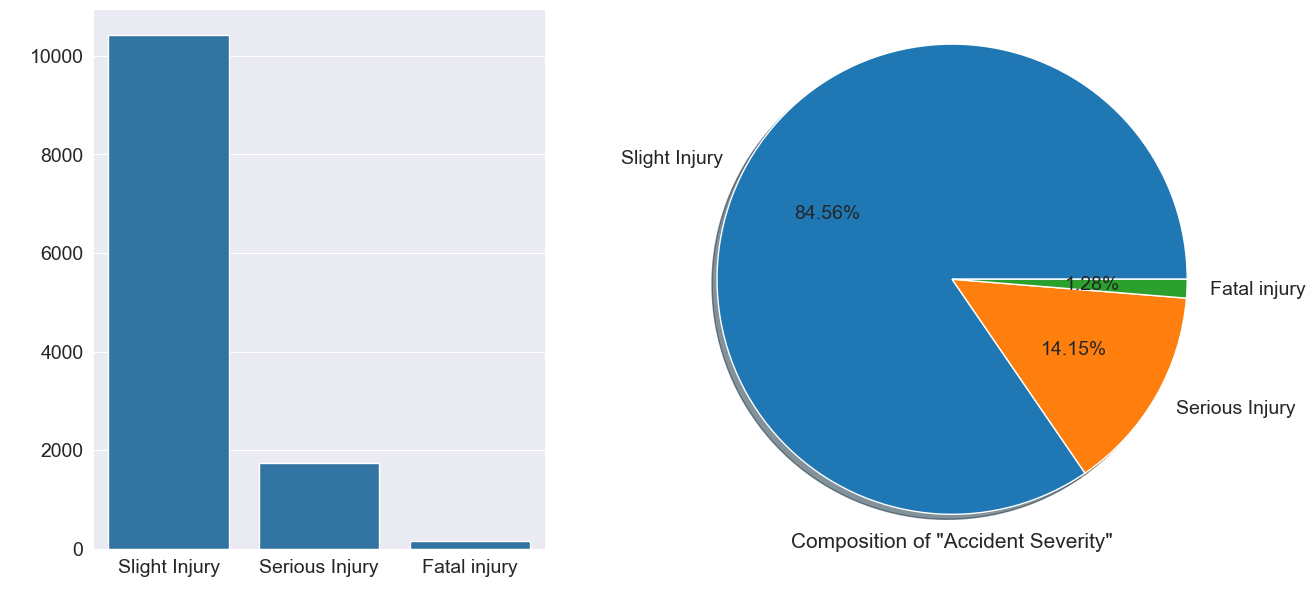

In [18]:
# Seeing the target
plt.figure(figsize=(14,7))
# barplot
ax1 = plt.subplot(1,2,1)
cp = sns.countplot(x=df["accident_severity"])
ax1.set_xlabel(" ")
ax1.set_ylabel(" ")
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14)
sns.despine(top=True, right=True)
# pieplot
ax2 = plt.subplot(1,2,2)
plt.pie(df["accident_severity"].value_counts(),
        labels=list(df["accident_severity"].unique()[:3]),
        autopct='%1.2f%%',
        shadow=True,
        radius=1.3,
        textprops={'fontsize':14}
        )
ax2.set_xlabel(" ")
plt.xlabel('Composition of "Accident Severity"', fontsize=15, labelpad=20)
plt.subplots_adjust(wspace=0.4)
plt.show()

In [19]:
df['time'] = pd.to_datetime(df['time'])

df['time'].dt.hour

#extracting hour and minute from timestamp
df['hour'] = df['time'].dt.hour
df['minute'] = df['time'].dt.minute
df.drop('time', axis=1, inplace=True)

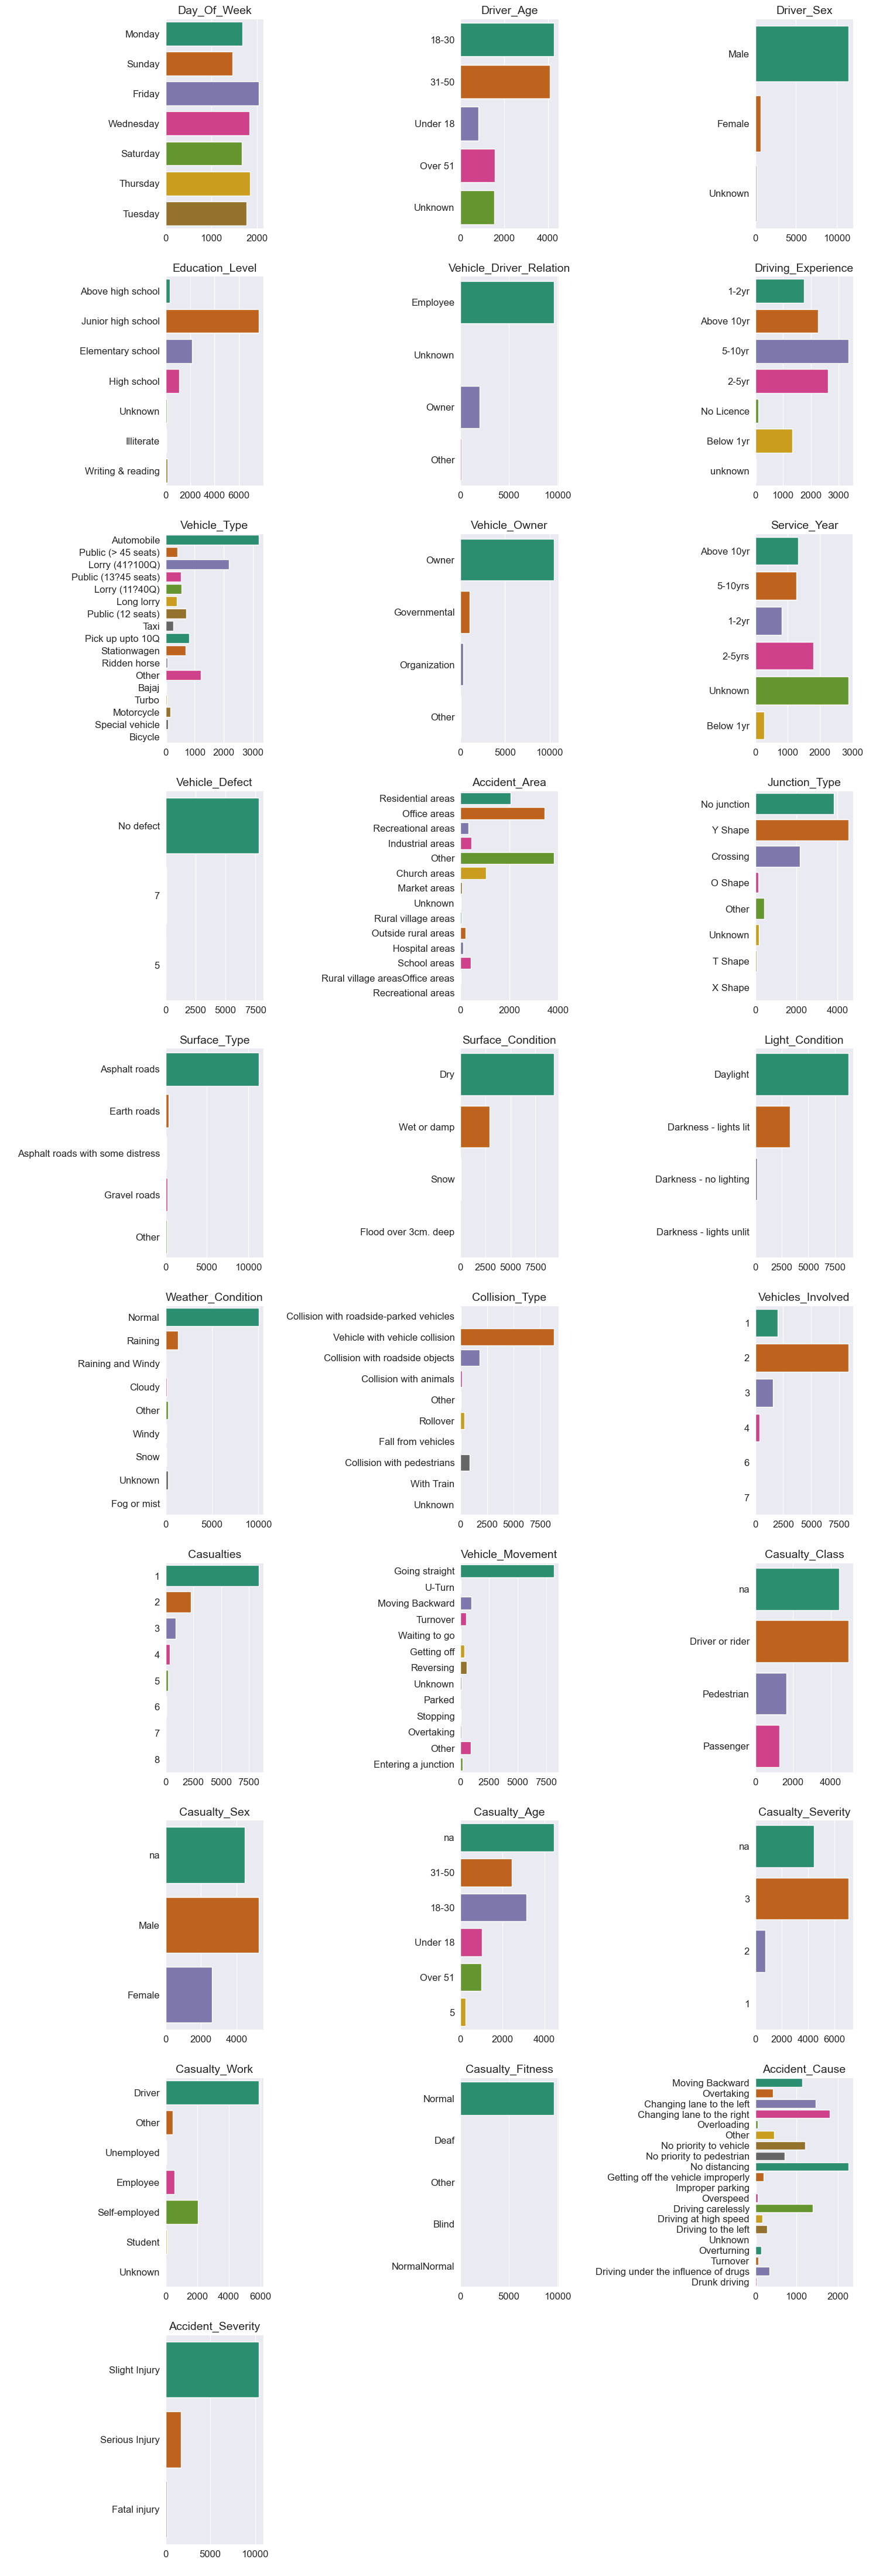

In [20]:
plt.figure(figsize=(15,70))
plotnumber = 1

for col in df.drop(['hour', 'minute', 'lanes', 'road_alignment', "pedestrian_movement" ], axis=1):
    if plotnumber <= df.shape[1]:
        ax1 = plt.subplot(16,3,plotnumber)
        sns.countplot(data=df , y=col , palette="Dark2")
        plt.xticks(fontsize= 12)
        plt.yticks(fontsize= 12)
        plt.title(col.title(), fontsize= 14)
        plt.xlabel(" ")
        plt.ylabel(" ")
    plotnumber += 1
plt.tight_layout()

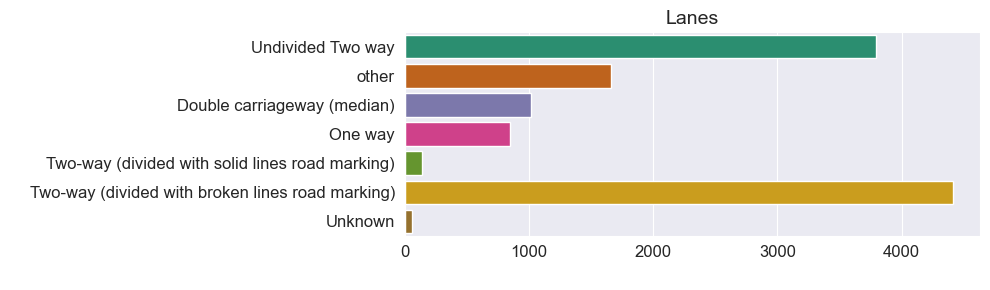

In [21]:
plt.figure(figsize=(10,3))
sns.countplot(data=df , y='lanes' , palette="Dark2")
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
plt.title("Lanes" , fontsize= 14)
plt.xlabel(" ")
plt.ylabel(" ")
plt.tight_layout()

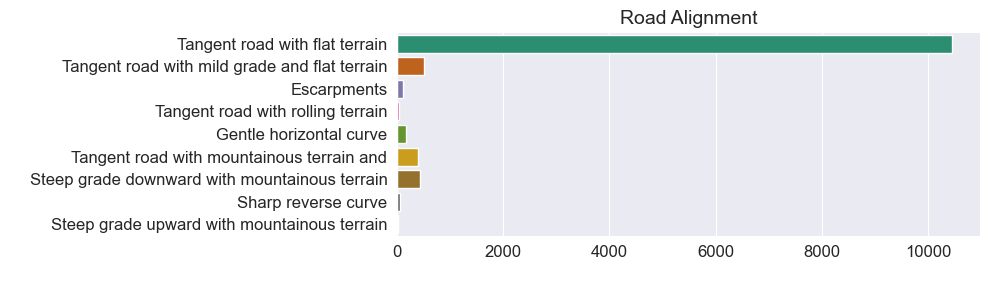

In [22]:
plt.figure(figsize=(10,3))
sns.countplot(data=df , y='road_alignment' , palette="Dark2")
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
plt.title("Road Alignment" , fontsize= 14)
plt.xlabel(" ")
plt.ylabel(" ")
plt.tight_layout()

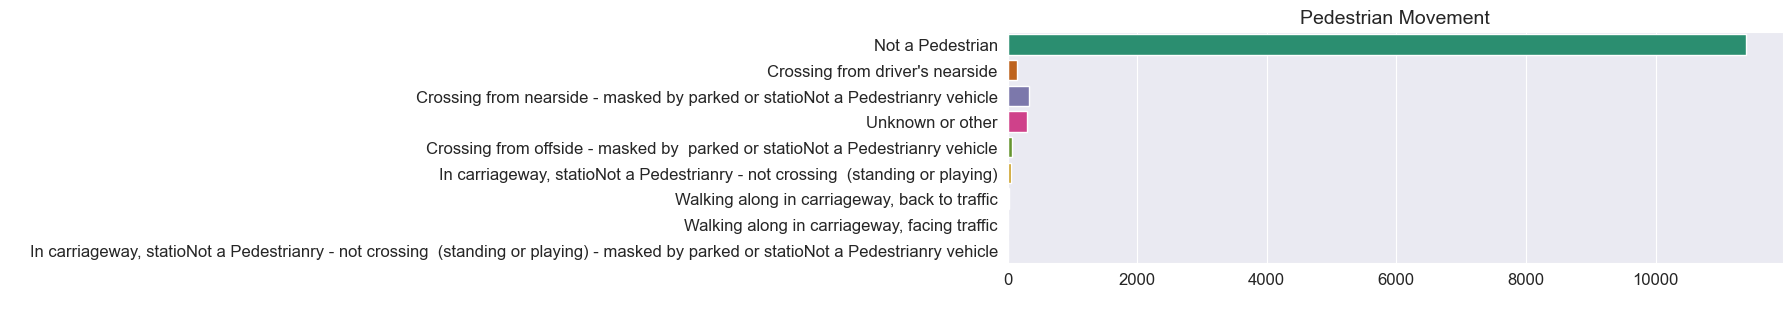

In [23]:
plt.figure(figsize=(10,3))
sns.countplot(data=df , y='pedestrian_movement' , palette="Dark2")
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
plt.title("Pedestrian Movement" , fontsize= 14)
plt.xlabel(" ")
plt.ylabel(" ")
plt.tight_layout()

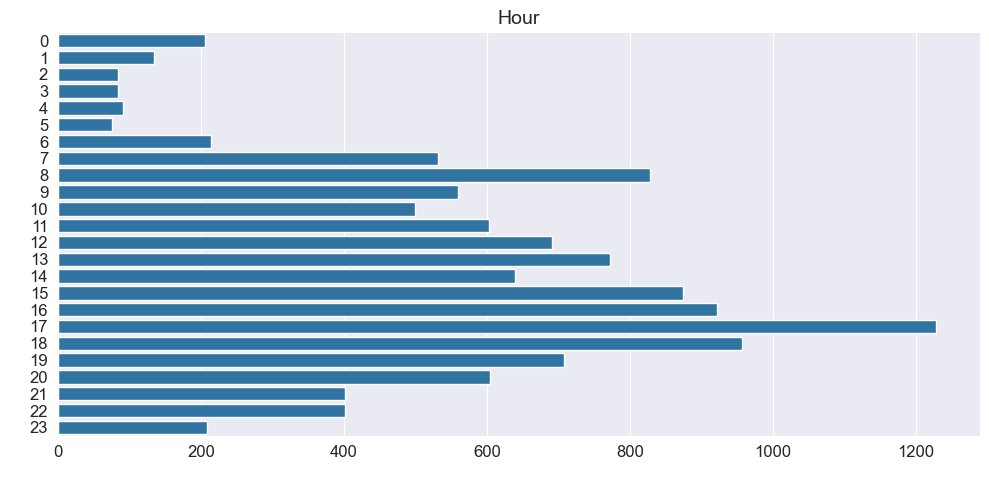

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(data=df , y='hour' )
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
plt.title("Hour" , fontsize= 14)
plt.xlabel(" ")
plt.ylabel(" ")
plt.tight_layout()

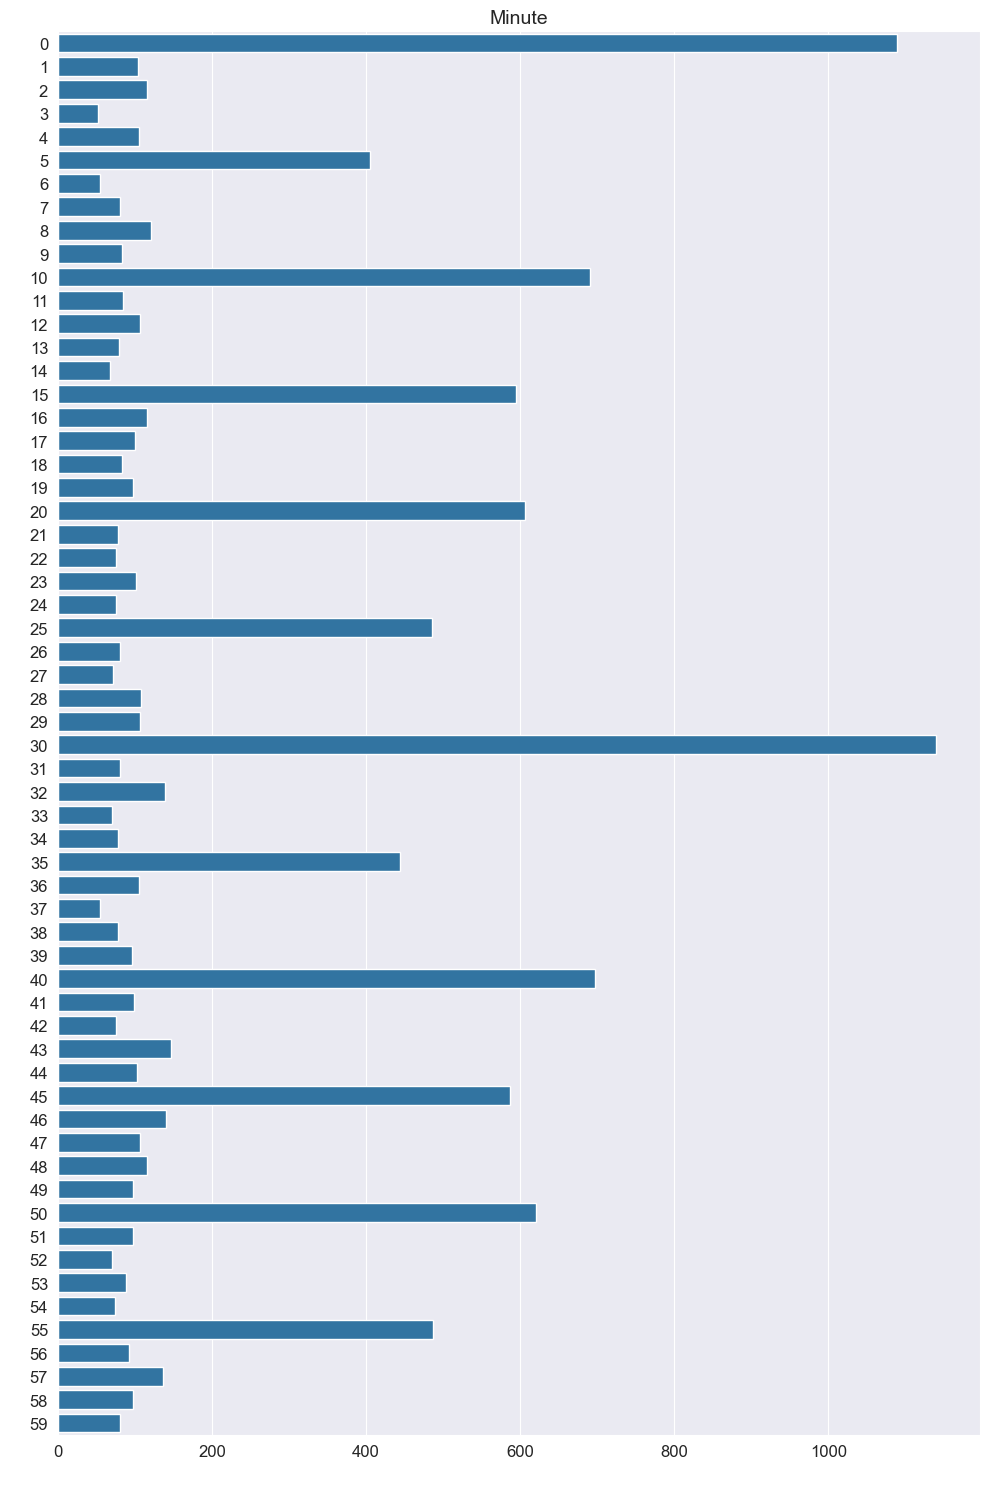

In [25]:
plt.figure(figsize=(10,15))
sns.countplot(data=df , y='minute' )
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
plt.title("Minute" , fontsize= 14)
plt.xlabel(" ")
plt.ylabel(" ")
plt.tight_layout()

In [26]:
min = list(range(5, 56, 5))
def convert_minutes(x: int):
    for m in min:
        if x / min == x and x > m-5:
            return m
        if x in [56, 57, 58 ,59]:
            return 0
        if x in min+[0]:
            return x

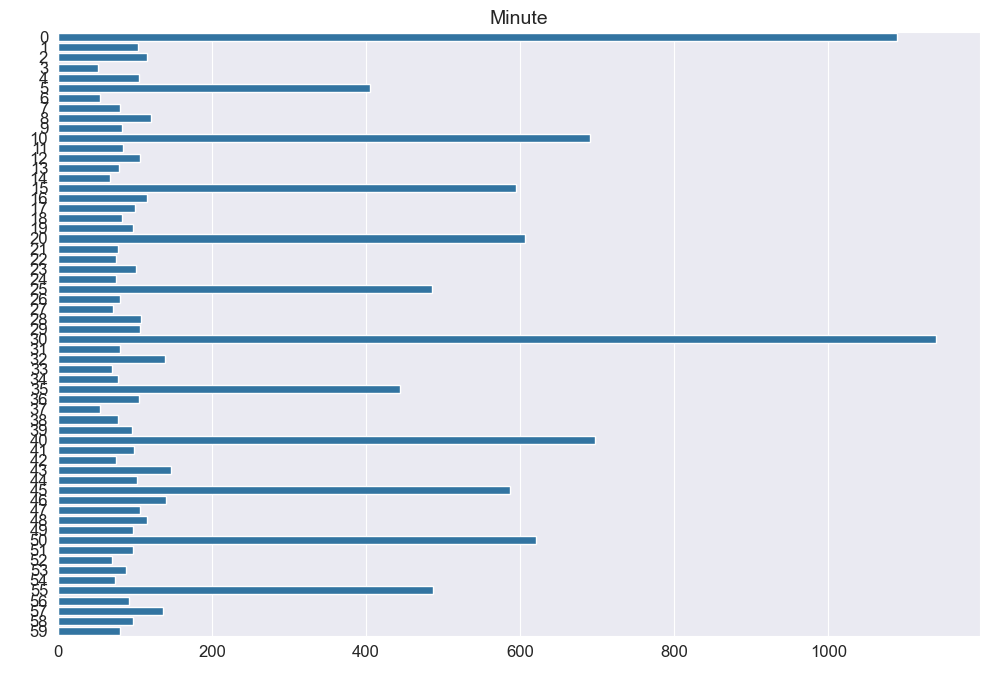

In [27]:
plt.figure(figsize=(10,7))
sns.countplot(data=df , y='minute' )
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
plt.title("Minute" , fontsize= 14)
plt.xlabel(" ")
plt.ylabel(" ")
plt.tight_layout()

In [28]:
hypothesis_df = df.copy(deep=True)

In [29]:
((hypothesis_df.groupby(['driver_sex']).size() / hypothesis_df["driver_sex"].count()) * 100).add_prefix("Accidents(in %) caused by")

driver_sex
Accidents(in %) caused byFemale      5.691783
Accidents(in %) caused byMale       92.862943
Accidents(in %) caused byUnknown     1.445274
dtype: float64

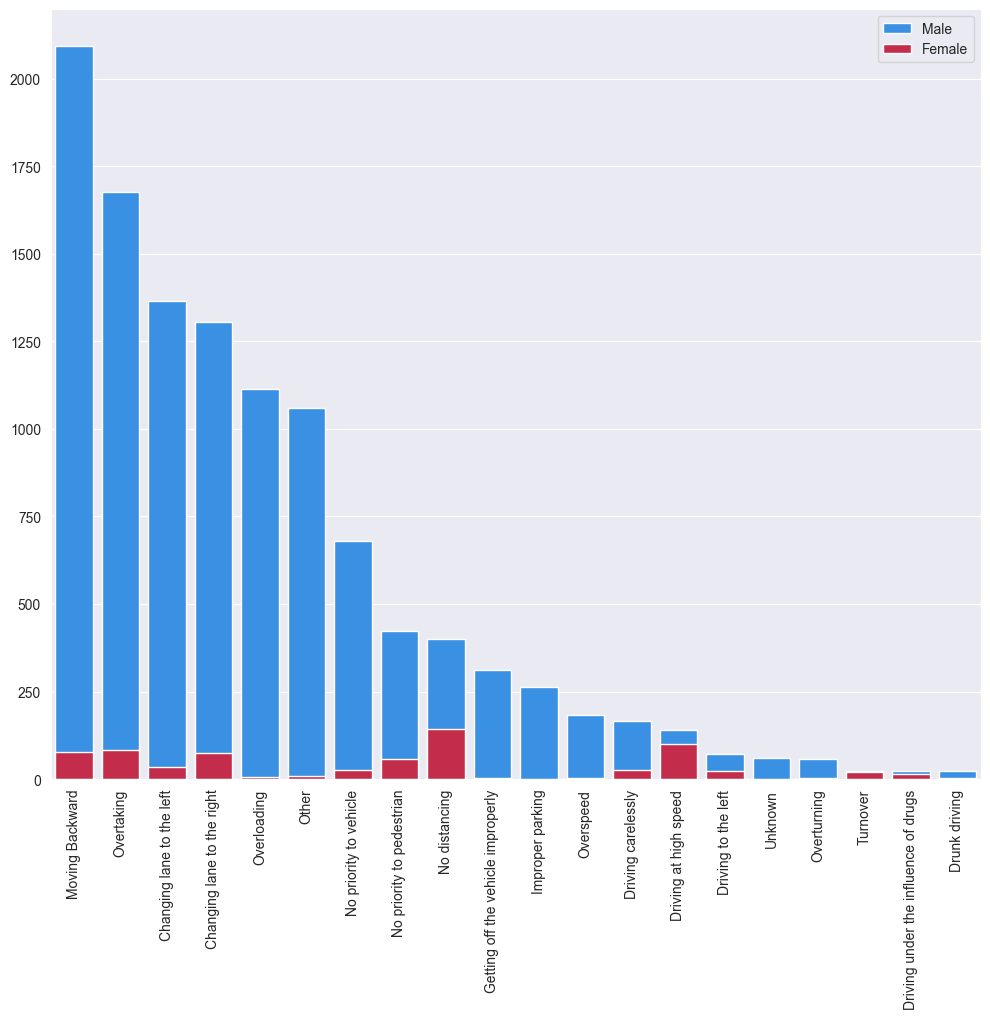

In [30]:
plt.figure(figsize=(12,10))
male_df = hypothesis_df.loc[hypothesis_df.driver_sex == 'Male']
female_df = hypothesis_df.loc[hypothesis_df.driver_sex == 'Female']
sns.barplot(x = male_df.accident_cause.unique()[:20],y=male_df.accident_cause.value_counts().values,color='dodgerblue',label="Male")
sns.barplot(x = female_df.accident_cause.unique()[:20],y=female_df.accident_cause.value_counts().values,color='crimson',label="Female")
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [31]:
# Hypothesis 1
ff = pd.crosstab(index=hypothesis_df['driver_sex'].loc[hypothesis_df['driver_sex'] !="Unknown"], columns=df['accident_severity'],
                 margins=True)
ff

accident_severity,Fatal injury,Serious Injury,Slight Injury,All
driver_sex,,,,
Female,5,104,592,701
Male,152,1621,9664,11437
All,157,1725,10256,12138


In [32]:
print("P(Gender = Female | Severity = Fatal) = " + str((ff.iloc[0,0])/(ff.iloc[0,3]*1.0)*100)+ '%')
print("P(Gender = Male | Severity = Fatal) = " + str((ff.iloc[1,0])/(ff.iloc[1,3]*1.0)*100)+ '%\n')

print("P(Gender = Female | Severity = Serious Injury) = " + str((ff.iloc[0,1])/(ff.iloc[0,3]*1.0)*100)+ '%')
print("P(Gender = Male | Severity = Serious Injury) = " + str((ff.iloc[1,1])/(ff.iloc[1,3]*1.0)*100)+ '%\n')

print("P(Gender = Female | Severity = Slight Injury) = " + str((ff.iloc[0,2])/(ff.iloc[0,3]*1.0)*100)+ '%')
print("P(Gender = Male | Severity = Slight Injury) = " + str((ff.iloc[1,2])/(ff.iloc[1,3]*1.0)*100)+ '%')


P(Gender = Female | Severity = Fatal) = 0.7132667617689016%
P(Gender = Male | Severity = Fatal) = 1.3290198478622017%

P(Gender = Female | Severity = Serious Injury) = 14.835948644793154%
P(Gender = Male | Severity = Serious Injury) = 14.173297193319925%

P(Gender = Female | Severity = Slight Injury) = 84.45078459343794%
P(Gender = Male | Severity = Slight Injury) = 84.49768295881788%


In [33]:
# Hypothesis 2
ff = pd.crosstab(index=hypothesis_df['accident_cause'], columns=hypothesis_df['accident_severity'],margins=True)
pd.crosstab(index=hypothesis_df['accident_cause'], columns=hypothesis_df['accident_severity'],margins=True)
ff

accident_severity,Fatal injury,Serious Injury,Slight Injury,All
accident_cause,,,,
Changing lane to the left,16,206,1251,1473
Changing lane to the right,23,260,1525,1808
Driving at high speed,2,31,141,174
Driving carelessly,22,209,1171,1402
Driving to the left,4,53,227,284
Driving under the influence of drugs,5,46,289,340
Drunk driving,0,3,24,27
Getting off the vehicle improperly,3,29,165,197
Improper parking,1,2,22,25


In [34]:
print(f'Injuries(all type due to speeding): {ff.iloc[2,2]}/{ff.iloc[3,3]}')
print(f'In Percentage: {(ff.iloc[2,2]/ff.iloc[3,3])*100} %')

Injuries(all type due to speeding): 141/1402
In Percentage: 10.057061340941512 %


In [35]:
# Hypothesis 3
ff = pd.crosstab(index=hypothesis_df['day_of_week'], columns=hypothesis_df['accident_severity'],margins=True)
pd.crosstab(index=hypothesis_df['day_of_week'], columns=hypothesis_df['accident_severity'],margins=True)
ff

accident_severity,Fatal injury,Serious Injury,Slight Injury,All
day_of_week,,,,
Friday,16,313,1712,2041
Monday,12,204,1465,1681
Saturday,37,245,1384,1666
Sunday,35,190,1242,1467
Thursday,22,272,1557,1851
Tuesday,17,257,1496,1770
Wednesday,19,262,1559,1840
All,158,1743,10415,12316


In [39]:
print("Accident Percentage on weekdays: " ,round(sum([ff.iloc[i,3] for i in range(0,7) if ff.index[i] not in ['Saturday','Sunday']])/ff.iloc[7,3],2))
print("Accident Percentage on weekends: " ,round(sum([ff.iloc[i,3] for i in range(0,7) if ff.index[i] in ['Saturday','Sunday']])/ff.iloc[7,3],2))

Accident Percentage on weekdays:  0.75
Accident Percentage on weekends:  0.25


In [40]:
# Hypothesis 4
# Are there more injuries in night then day?
ff = pd.crosstab(index=hypothesis_df['light_condition'], columns=hypothesis_df['accident_severity'],margins=True)
pd.crosstab(index=hypothesis_df['light_condition'], columns=hypothesis_df['accident_severity'],margins=True)
ff

accident_severity,Fatal injury,Serious Injury,Slight Injury,All
light_condition,,,,
Darkness - lights lit,66,465,2755,3286
Darkness - lights unlit,0,7,33,40
Darkness - no lighting,5,49,138,192
Daylight,87,1222,7489,8798
All,158,1743,10415,12316


In [41]:
sol = 0
for i in [0,1]:
    for j in [0,1,2]:
        sol += ff.iloc[j,i]

r = sol/(sum(ff.iloc[i,3] for i in [0,1,2]))
print("Dangerous injuries at night: ", round(r,2),'%')
r = sum(ff.iloc[i,2] for i in [0,1,2])/sum(ff.iloc[i,3] for i in [0,1,2])
print("Slight injuries at night: ", round(r,2),'%')

Dangerous injuries at night:  0.17 %
Slight injuries at night:  0.83 %


In [42]:
r = sum(ff.iloc[3,i] for i in [0,1])/ff.iloc[3,3]
print("Dangerous injuries at day: " ,round(r,2) ,'%')
r = ff.iloc[3,2]/ff.iloc[3,3]
print("Slight injuries at day: " ,round(r,2) ,'%')

Dangerous injuries at day:  0.15 %
Slight injuries at day:  0.85 %


In [43]:
# Hypothesis 5
# More Accidents on some non-normal weather
ff = pd.crosstab(index=hypothesis_df['weather_condition'], columns=hypothesis_df['accident_severity'],margins=True)
pd.crosstab(index=hypothesis_df['weather_condition'], columns=hypothesis_df['accident_severity'],margins=True)
ff

accident_severity,Fatal injury,Serious Injury,Slight Injury,All
weather_condition,,,,
Cloudy,0,8,117,125
Fog or mist,0,1,9,10
Normal,135,1474,8454,10063
Other,0,28,268,296
Raining,23,158,1150,1331
Raining and Windy,0,2,38,40
Snow,0,5,56,61
Unknown,0,51,241,292
Windy,0,16,82,98


# Preprocessing

In [44]:
df.isna().sum()

day_of_week                   0
driver_age                    0
driver_sex                    0
education_level             741
vehicle_driver_relation     579
driving_experience          829
vehicle_type                950
vehicle_owner               482
service_year               3928
vehicle_defect             4427
accident_area               239
lanes                       385
road_alignment              142
junction_type               887
surface_type                172
surface_condition             0
light_condition               0
weather_condition             0
collision_type              155
vehicles_involved             0
casualties                    0
vehicle_movement            308
casualty_class                0
casualty_sex                  0
casualty_age                  0
casualty_severity             0
casualty_work              3198
casualty_fitness           2635
pedestrian_movement           0
accident_cause                0
accident_severity             0
hour    

In [45]:
df.drop(columns=['vehicle_defect','vehicle_driver_relation','casualty_work','casualty_fitness'],inplace=True)

In [47]:
impute_cols = [x for x in df.isna().sum()[df.isna().sum() != 0].index.tolist()]
for feast in impute_cols:
    mode = df[feast].mode()[0]
    df[feast].fillna(mode,inplace=True)

In [48]:
df.isna().sum()

day_of_week            0
driver_age             0
driver_sex             0
education_level        0
driving_experience     0
vehicle_type           0
vehicle_owner          0
service_year           0
accident_area          0
lanes                  0
road_alignment         0
junction_type          0
surface_type           0
surface_condition      0
light_condition        0
weather_condition      0
collision_type         0
vehicles_involved      0
casualties             0
vehicle_movement       0
casualty_class         0
casualty_sex           0
casualty_age           0
casualty_severity      0
pedestrian_movement    0
accident_cause         0
accident_severity      0
hour                   0
minute                 0
dtype: int64

# Encoding

In [51]:
def ordinal_encoder(df, feasts):
    for feat in feasts:
        feat_val = list(np.arange(df[feat].nunique()))
        feat_key = list(df[feat].sort_values().unique())
        feat_dict = dict(zip(feat_key, feat_val))
        df[feat] = df[feat].map(feat_dict)
    return df

df = ordinal_encoder(df, df.drop(['accident_severity'], axis=1).columns)
df.shape

(12316, 29)

In [52]:
df.head()

,day_of_week,driver_age,driver_sex,education_level,driving_experience,vehicle_type,vehicle_owner,service_year,accident_area,lanes,road_alignment,junction_type,surface_type,surface_condition,light_condition,weather_condition,collision_type,vehicles_involved,casualties,vehicle_movement,casualty_class,casualty_sex,casualty_age,casualty_severity,pedestrian_movement,accident_cause,accident_severity,hour,minute
0,1,0,1,0,0,0,3,3,9,2,5,1,0,0,3,2,3,1,1,2,3,2,5,3,5,9,Slight Injury,17,2
1,1,1,1,4,3,11,3,2,6,4,5,1,0,0,3,2,8,1,1,2,3,2,5,3,5,16,Slight Injury,17,2
2,1,0,1,4,0,5,3,5,1,6,5,1,0,0,3,2,2,1,1,2,0,1,1,2,5,0,Serious Injury,17,2
3,3,0,1,4,2,11,0,5,6,6,6,7,2,0,0,2,8,1,1,2,2,0,0,2,5,1,Slight Injury,1,6
4,3,0,1,4,1,0,3,2,4,6,5,7,0,0,0,2,8,1,1,2,3,2,5,3,5,16,Slight Injury,1,6


In [60]:
X = df.drop('accident_severity',axis=1)
y = df['accident_severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8621, 28) (3695, 28) (8621,) (3695,)


In [62]:
counter = Counter(y_train)


for k,v in counter.items():
    per = 100 * v / len(y_train)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

counter = Counter(y_train)

print("-----------------------------")

for k,v in counter.items():
    per = 100 * v / len(y_train)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

print("Upsampled Dataset shape: ", X_train.shape, y_train.shape)

Class= Slight Injury, n=7324 (33.33%)
Class= Serious Injury, n=7324 (33.33%)
Class= Fatal injury, n=7324 (33.33%)
-----------------------------
Class= Slight Injury, n=7324 (33.33%)
Class= Serious Injury, n=7324 (33.33%)
Class= Fatal injury, n=7324 (33.33%)
Upsampled Dataset shape:  (21972, 28) (21972,)


In [63]:
y_test = ordinal_encoder(pd.DataFrame(y_test,columns=['accident_severity']),pd.DataFrame(y_test,columns=['accident_severity']).columns)['accident_severity']
y_train = ordinal_encoder(pd.DataFrame(y_train,columns=['accident_severity']),pd.DataFrame(y_train,columns=['accident_severity']).columns)['accident_severity']

# Baseline Modelling

In [64]:
def modelling(X_train, y_train, X_test, y_test, **kwargs):
    scores = {}
    models = []
    bvd = {}
    if 'xgb' in kwargs.keys() and kwargs['xgb']:
        xgb = XGBClassifier()
        xgb.fit(X_train._get_numeric_data(),np.ravel(y_train, order='C'))
        y_pred = xgb.predict(X_test._get_numeric_data())
        scores['xgb'] = [accuracy_score(y_test, y_pred)]
        models.append(xgb)

    if 'rf' in kwargs.keys() and kwargs['rf']:
        rf = RandomForestClassifier(n_estimators=200)
        rf.fit(X_train , y_train)
        y_pred = rf.predict(X_test)
        scores['rf'] = [accuracy_score(y_test, y_pred)]
        models.append(rf)

    if 'extree' in kwargs.keys() and kwargs['extree']:
        extree = ExtraTreesClassifier()
        extree.fit(X_train , y_train)
        y_pred = extree.predict(X_test)
        scores['extree'] = [accuracy_score(y_test, y_pred)]
        models.append(extree)

    return scores, models

In [65]:
scores , models = modelling(X_train, y_train, X_test, y_test, xgb=True, rf=True, extree=True)
print(scores)


{'xgb': [0.8032476319350473], 'rf': [0.7991880920162382], 'extree': [0.8132611637347767]}


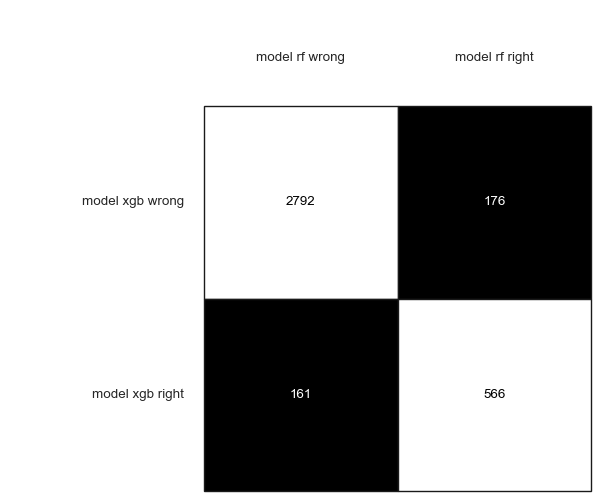

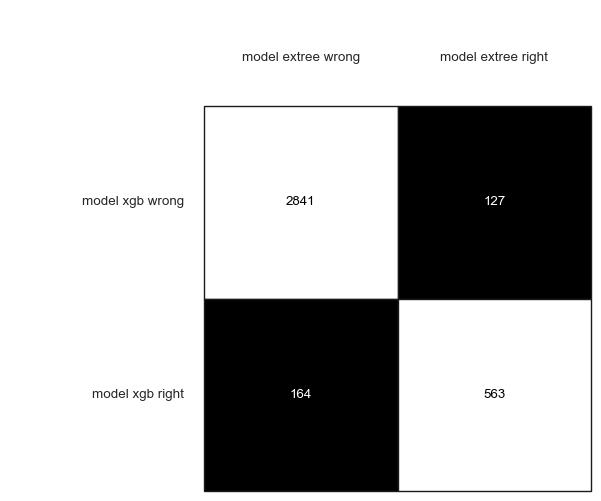

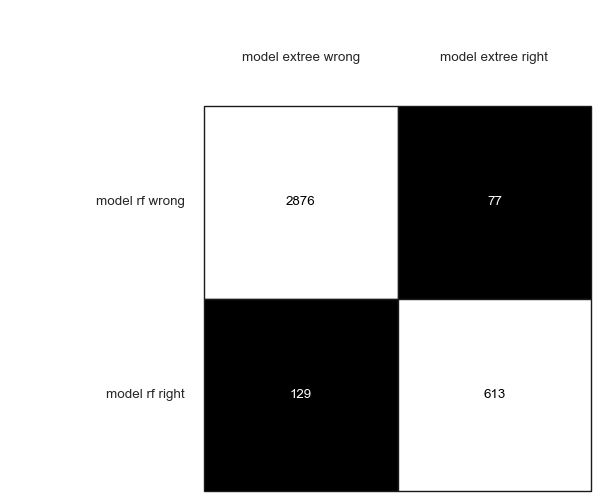

In [67]:
y_pred_xgb = models[0].predict(X_test)
y_pred_rf = models[1].predict(X_test)
y_pred_extree = models[2].predict(X_test)


tb = mcnemar_tables(y_test, y_pred_xgb, y_pred_rf, y_pred_extree)

brd = checkerboard_plot(tb["model_0 vs model_1"],figsize=(5,5),fmt='%d',col_labels=["model rf wrong", "model rf right"],
                        row_labels=["model xgb wrong", "model xgb right"])
plt.show()

brd = checkerboard_plot(tb["model_0 vs model_2"],
                        figsize=(5,5),
                        fmt='%d',
                        col_labels=["model extree wrong", "model extree right"],
                        row_labels=["model xgb wrong", "model xgb right"])
plt.show()

brd = checkerboard_plot(tb["model_1 vs model_2"],
                        figsize=(5,5),
                        fmt='%d',
                        col_labels=["model extree wrong", "model extree right"],
                        row_labels=["model rf wrong", "model rf right"])
plt.show()

In [68]:
def model_performance(model, y_test, y_hat):
    conf_matrix = confusion_matrix(y_test, y_hat)
    tracel = go.Heatmap(z=conf_matrix,x=['0 (pred)','1 (pred)','2 (pred)'],y=['0 (true)','1 (true)','2 (true)'],xgap=2,ygap=2,colorscale="Viridis",showscale=False)

    # Show Matrix
    Accuracy = accuracy_score(y_test, y_hat)
    Precision = precision_score(y_test, y_pred, average='weighted')
    Recall = recall_score(y_test, y_pred, average='weighted')
    F1_score = f1_score(y_test, y_pred, average='weighted')

    show_matrics = pd.DataFrame(data=[[Accuracy,Precision,Recall,F1_score]])
    show_matrics = show_matrics.T

    colors = ["gold","lightgreen","lightcoral","lightskyblue"]
    trace2 = go.Bar(x=show_matrics[0].values,y=["Accuracy","Precision","Recall","F1_score"],
                    text = np.round_(show_matrics[0].values,4),
                    textposition='auto',
                    orientation='h',
                    opacity=0.8,
                    maker=dict(colors=colors,line=dict(color ="#000000"),width=1.5))
    
    model = model 

    fig = tls.make_subplots(rows=2 , cols=2 , print_grid=False,
                            subplot_titles=("Confusion_Matrix","Matrix"))
    
    fig.append_trace(tracel,1,1)
    fig.append_trace(trace2,2,1)

    fig['layout'].update(showlegend = False , title = "Model Performance",
                         autosize = True,
                         )
    
    fig.layout.titlefont.size = 15

    py.iplot(fig, filename="model_performance")

In [69]:
extree = ExtraTreesClassifier()
extree.fit(X_train , y_train)
y_pred = extree.predict(X_test)

In [70]:
extree.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
print(model_performance(extree, y_test, y_pred))

# Hyperparameter tuning

In [75]:
gkf = KFold(n_splits=3, shuffle=True, random_state=42).split(X=X_train, y=y_train)

params = {
    'n_estimators': range(100,500,100),
    'ccp_alpha' : [0.0 , 0.1],
    'criterion': ['gini'],
    'max_depth': [5,11],
}

extree_estimator = ExtraTreesClassifier()

gsearch = GridSearchCV(
    estimator=extree_estimator,
    param_grid=params,
    scoring='f1_weighted',
    n_jobs=-1,
    cv=gkf,
    verbose=1
)

extree_model = gsearch.fit(X=X_train, y=y_train)
(gsearch.best_params_, gsearch.best_score_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


({'ccp_alpha': 0.0, 'criterion': 'gini', 'max_depth': 11, 'n_estimators': 400},
 0.8618482523930829)

In [77]:
gkf2 = KFold(n_splits=3, shuffle=True, random_state=101).split(X=X_train, y=y_train)

params2 = {
    'max_depth': [11,15],
    'class_weight': ['balanced',None],
}

extree2 = ExtraTreesClassifier(ccp_alpha=0.0, criterion='gini', max_depth=11, min_samples_split=3)

gsearch2 = GridSearchCV(
    estimator=extree2,
    param_grid=params2,
    scoring='f1_weighted',
    n_jobs=-1,
    cv=gkf2,
    verbose=3
)

extree_model2 = gsearch2.fit(X=X_train, y=y_train)
(gsearch2.best_params_, gsearch2.best_score_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


({'class_weight': None, 'max_depth': 15}, 0.91795222476618)

In [78]:
extree_tuned = ExtraTreesClassifier(ccp_alpha=0.0, criterion='gini', max_depth=15, min_samples_split=2, n_estimators=400)

extree_tuned.fit(X_train , y_train)

ExtraTreesClassifier(max_depth=15, n_estimators=400)

In [79]:
print(extree_tuned.feature_importances_)

[0.05300848 0.05908907 0.01635274 0.02991458 0.0421919  0.03160529
 0.02163619 0.03435361 0.02632121 0.03777745 0.01399992 0.04349424
 0.01113002 0.04113092 0.06935516 0.0169253  0.03212581 0.06352169
 0.06657276 0.01911838 0.03202226 0.03582168 0.03183051 0.02594885
 0.01099235 0.0379093  0.0397449  0.05610543]


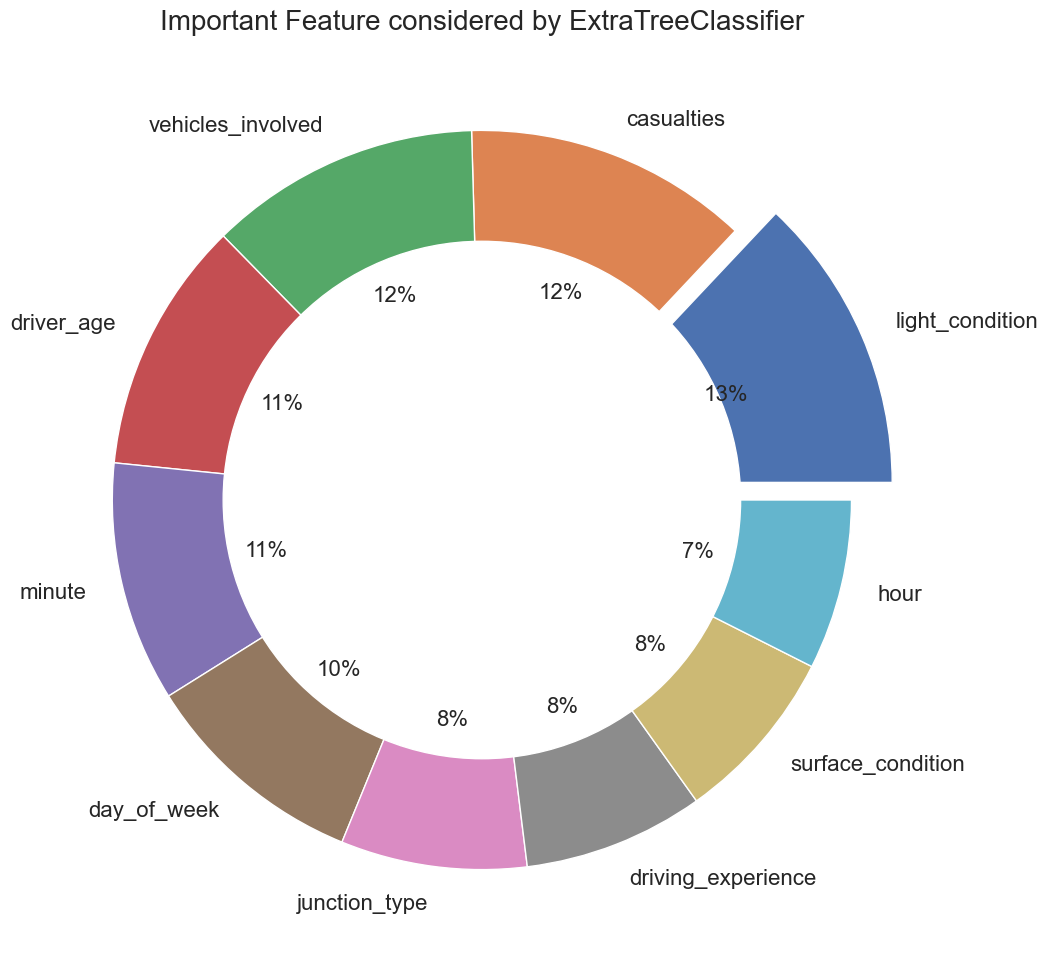

In [80]:
feat_importance = pd.Series(extree_tuned.feature_importances_, index=X.columns)
plt.figure(figsize=(12,12))
myexplode = [0.12,0,0,0,0,0,0,0,0,0]
plt.pie(feat_importance.nlargest(10),labels=feat_importance.nlargest(10).index,autopct='%.0f%%',explode=myexplode,
        textprops={'fontsize': 16})
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Important Feature considered by ExtraTreeClassifier",fontsize=20)
plt.show()

# Explainable AI

In [81]:
import shap

In [82]:
shap.initjs()

In [83]:
sample_set = X_train.sample(10)

In [84]:
explainer = shap.Explainer(extree_tuned)

In [85]:
shap_values_beeswarm = explainer(sample_set,check_additivity=False)

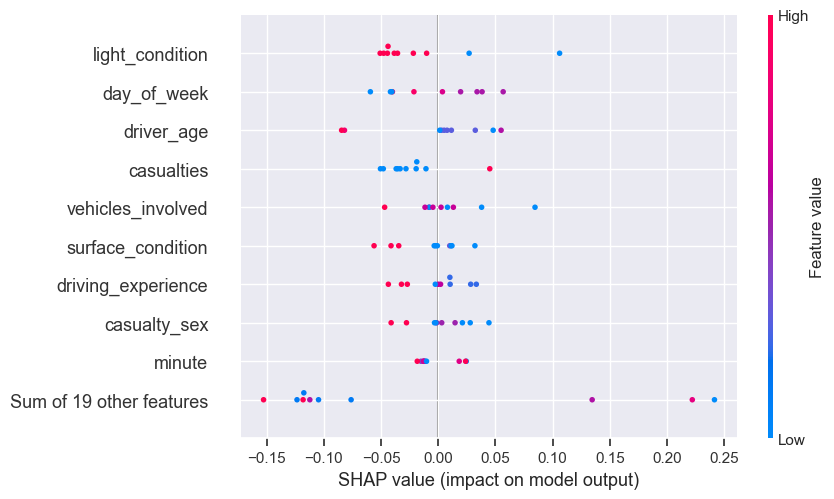

In [86]:
shap.plots.beeswarm(shap_values_beeswarm[:,:,0])